# Predicting phone prices based on features

data source: https://www.kaggle.com/datasets/atefehmirnaseri/cell-phone-price?select=CellPhone_train.csv

In [1]:
import pandas as pd

In [10]:
df = pd.read_csv('CellPhone_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

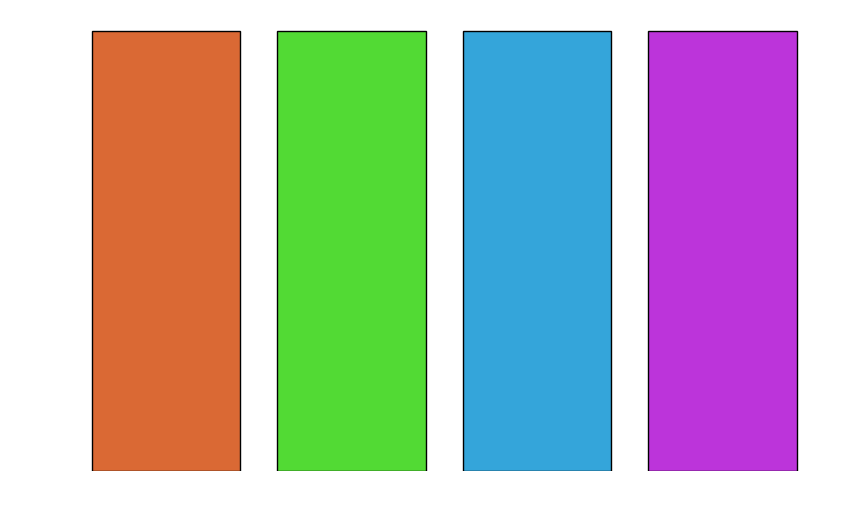

In [11]:
import matplotlib.pyplot as plt

# Calculate frequency of each price range in the DataFrame column
counts = df['price_range'].value_counts()

# Reorder the counts based on specified order of price ranges
ordered_counts = counts.reindex([0, 1, 2, 3], fill_value=0)

# Define tick labels
tick_labels = ['Budget', 'Mid-range', 'Premium', 'Luxury']

# Define colors
colors = ['#da6934', '#52da34', '#34a5da', '#bc34da']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(ordered_counts.index, ordered_counts, color=colors, edgecolor='black')
plt.ylabel('', color='white', fontsize=14)
plt.xticks(ordered_counts.index, tick_labels, color='white', fontsize=14)  # Set x-ticks and their labels
plt.yticks(color='white', fontsize=14)  # Set y-ticks and their labels
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='both', colors='white')
plt.savefig('bar_chart_price_range_counts.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


In [8]:
df.corr().price_range.sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

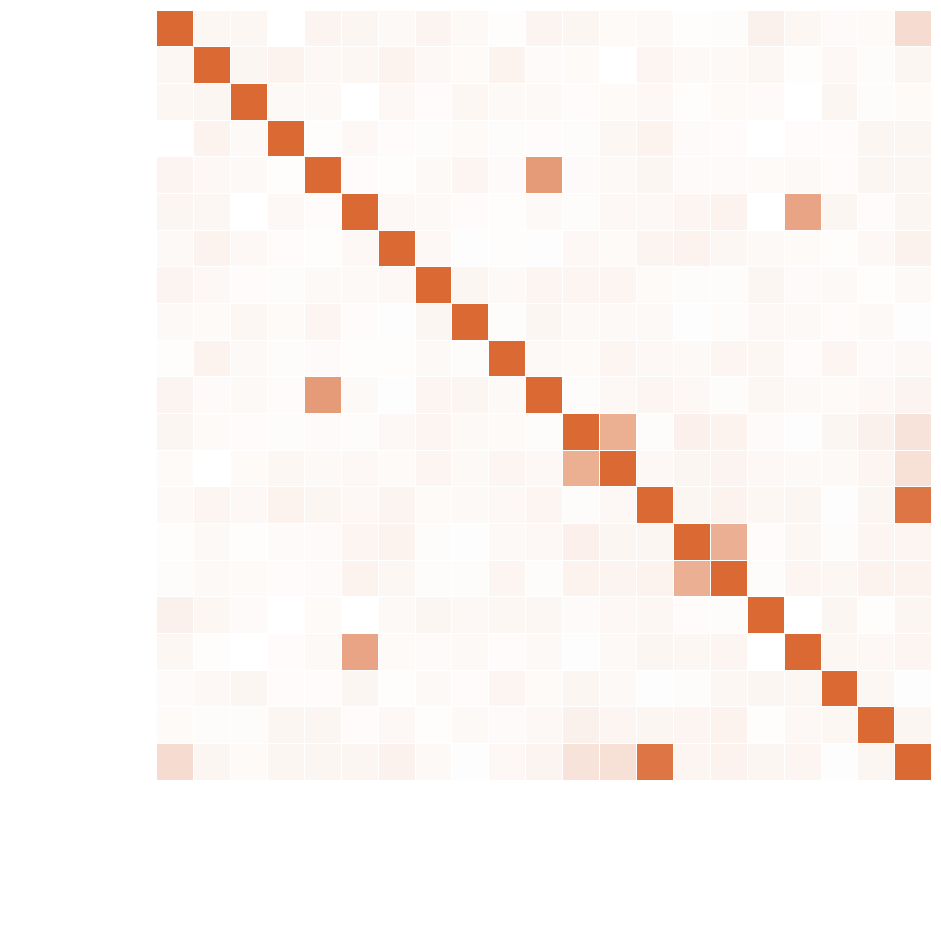

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Convert hexadecimal color code to RGB format
hex_color = '#da6934'
rgb_color = plt.matplotlib.colors.hex2color(hex_color)

# Define a custom colormap with alpha values ranging from 0 (transparent) to 1 (opaque)
colors = [(1, 1, 1, 0)] + [(*rgb_color, i) for i in np.linspace(0, 1, 256)]
custom_cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("CustomMap", colors)
plt.figure(figsize=(10, 10))
# Create the heatmap with the customized colormap
sns.heatmap(df.corr(), cmap=custom_cmap, annot=False, fmt="", linewidths=0.5, cbar=False)

# Set tick labels and tick parameters
plt.xticks(color='white', fontsize=14)
plt.yticks(color='white', rotation=0, fontsize=14)
plt.tick_params(axis='both', length=0)

# Set labels for x-axis and y-axis
plt.xlabel("", color='white', fontsize=17)
plt.ylabel("", color='white', fontsize=17)

# Show the plot
plt.savefig('confusionmatrix_dfdata.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

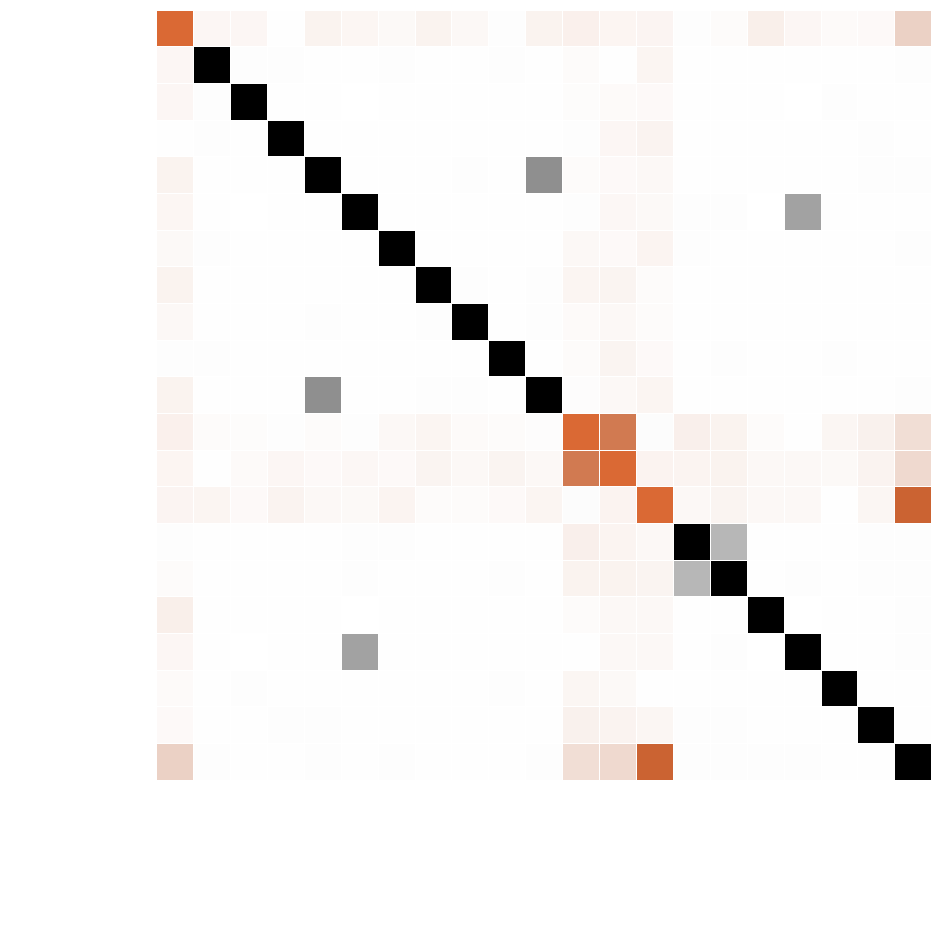

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Calculate the correlation matrix
corr_matrix = df.corr()

# Find the columns with the 4 highest correlations with 'price_range'
target_column = 'price_range'
top_columns = corr_matrix[target_column].abs().nlargest(5).index.tolist()
top_columns.remove(target_column)

# Convert hexadecimal color code to RGB format
hex_color = '#da6934'
rgb_color = plt.matplotlib.colors.hex2color(hex_color)

# Define custom colormaps
colors_colored = [(1, 1, 1, 0)] + [(*rgb_color, i) for i in np.linspace(0, 1, 256)]
custom_cmap_colored = plt.matplotlib.colors.LinearSegmentedColormap.from_list("CustomMapColored", colors_colored)

# Greyscale colormap with transparency
colors_greyscale = [(i, i, i, alpha) for i, alpha in zip(np.linspace(1, 0, 256), np.linspace(0, 1, 256))]
custom_cmap_greyscale = plt.matplotlib.colors.LinearSegmentedColormap.from_list("CustomMapGreyscale", colors_greyscale)

# Create the heatmap
plt.figure(figsize=(10, 10))

# Apply greyscale colormap to the entire matrix
sns.heatmap(corr_matrix, cmap=custom_cmap_greyscale, annot=False, fmt="", linewidths=0.5, cbar=False)

# Overlay colored colormap for the top correlated columns
for col in top_columns:
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[:, df.columns.get_loc(col)] = True
    mask[df.columns.get_loc(col), :] = True
    sns.heatmap(corr_matrix, cmap=custom_cmap_colored, mask=~mask, annot=False, fmt="", linewidths=0.5, cbar=False)

# Set tick labels and tick parameters
plt.xticks(color='white', fontsize=14)
plt.yticks(color='white', rotation=0, fontsize=14)
plt.tick_params(axis='both', length=0)

# Set labels for x-axis and y-axis
plt.xlabel("", color='white', fontsize=17)
plt.ylabel("", color='white', fontsize=17)

# Save the plot
plt.savefig('confusionmatrix_dfdatafiltered.png', dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('price_range', axis=1)
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame containing the dataset

# Step 2: Preprocess the data if needed (e.g., scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming all columns are numerical

# Step 3: Instantiate the KMeans model with the desired number of clusters
num_clusters = 4  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')

# Step 4: Fit the KMeans model to your data
kmeans.fit(X_scaled)

# Step 5: Use the fitted model to predict the cluster labels for your data
cluster_labels = kmeans.predict(X_scaled)

# Step 6: Add the predicted cluster labels as a new column to your dataset
X['Cluster'] = cluster_labels
X = X.drop(columns=['blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])

In [17]:
X

,battery_power,px_height,px_width,ram,Cluster
0,842,20,756,2549,3
1,1021,905,1988,2631,1
2,563,1263,1716,2603,1
3,615,1216,1786,2769,1
4,1821,1208,1212,1411,2
...,...,...,...,...,...
1995,794,1222,1890,668,1
1996,1965,915,1965,2032,1
1997,1911,868,1632,3057,0
1998,1512,336,670,869,0


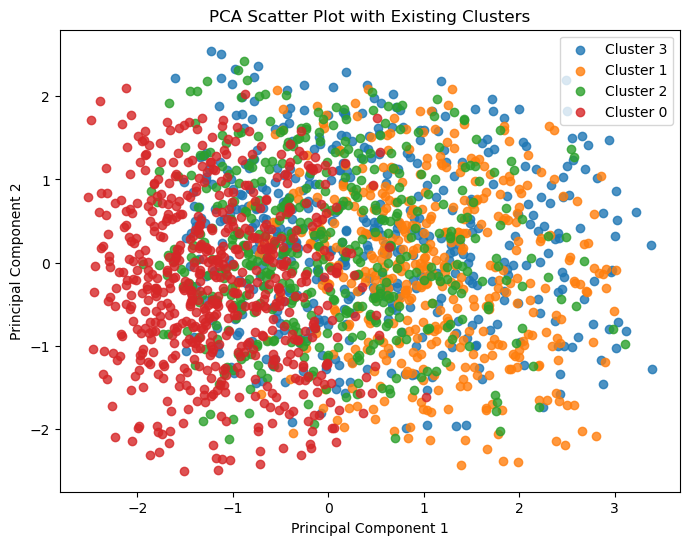

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3','PC4'])

# Scatter plot of the PCA results with existing cluster coloring
plt.figure(figsize=(8, 6))
for cluster in X['Cluster'].unique():
    plt.scatter(pca_df.loc[X['Cluster'] == cluster, 'PC1'], 
                pca_df.loc[X['Cluster'] == cluster, 'PC2'], 
                label=f'Cluster {cluster}', alpha=0.8)
plt.title('PCA Scatter Plot with Existing Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(False)
plt.show()




# Compare Classifiers

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import xgboost as xgb
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split

classifiers = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_jobs=-1),
    SVC(),
    KNeighborsClassifier(n_jobs=-1),
    xgb.XGBClassifier()
]

scaler = StandardScaler()

for classifier in classifiers:
    if classifier == SVC():  # For SVM, include a parameter grid
        param_grid = {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}
    elif classifier == xgb.XGBClassifier():  # For XGBoost, include a parameter grid
        param_grid = {'xgbclassifier__max_depth': [3, 5, 7], 'xgbclassifier__learning_rate': [0.1, 0.01]}
    else:
        param_grid = {}  # For other classifiers, use an empty parameter grid

    pipe = make_pipeline(scaler, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_score = grid.best_score_
    
    print(f"Best Cross fold score {classifier.__class__.__name__}: {best_score:.3f}")
    print(f"Best Parameters: {grid.best_params_}\n")



Best Cross fold score LogisticRegression: 0.951
Best Parameters: {}

Best Cross fold score DecisionTreeClassifier: 0.821
Best Parameters: {}

Best Cross fold score RandomForestClassifier: 0.857
Best Parameters: {}

Best Cross fold score SVC: 0.861
Best Parameters: {}

Best Cross fold score KNeighborsClassifier: 0.466
Best Parameters: {}

Best Cross fold score XGBClassifier: 0.895
Best Parameters: {}



## Select LogisticRegressor

Precision: 0.9764044677887412
Recall: 0.9764285714285714
F1 Score: 0.9764095593430316
Accuracy: 0.9764285714285714


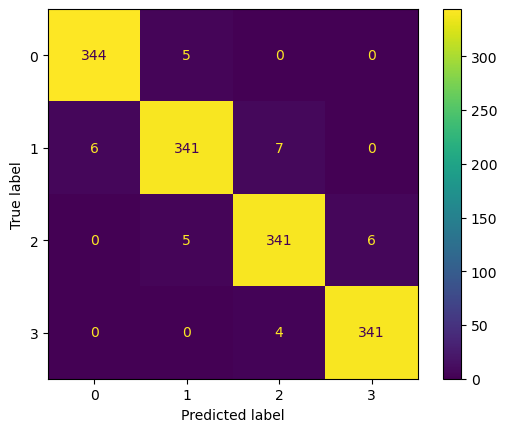

In [20]:
classifier = LogisticRegression(max_iter=1000)
pipe=make_pipeline(scaler,classifier)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

print(f"Precision: {precision_score(y_train, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_train, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_train, y_pred, average='weighted')}")
print(f"Accuracy: {accuracy_score(y_train, y_pred)}")
ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train)
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score from folds: 0.9650000000000001
Best params: {'logisticregression__C': 12, 'logisticregression__class_weight': None, 'logisticregression__solver': 'newton-cg'}
Precision: 0.9849936657431083
Recall: 0.985
F1 Score: 0.9849797984639508
Accuracy: 0.985


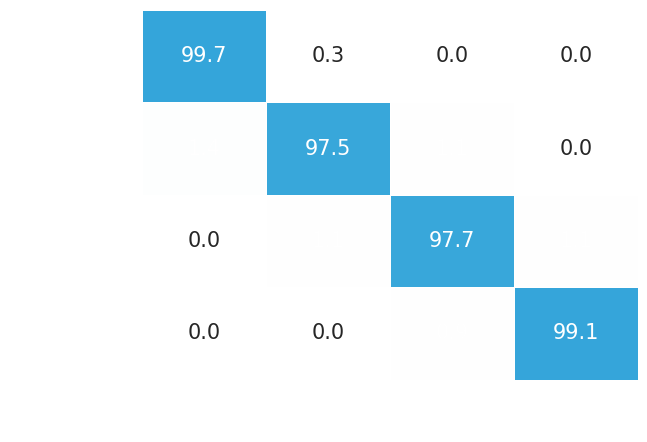

In [24]:
param_grid = {
    'logisticregression__C': [12,13,14,15,16],  # Regularization strength
    # 'logisticregression__penalty': ['l1', 'l2'],  # Regularization penalty
    'logisticregression__solver': ['newton-cg'],
    'logisticregression__class_weight': [None, 'balanced']  # Class weights
}


classifier = LogisticRegression(max_iter=1000)
pipe=make_pipeline(scaler,classifier)



grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid.fit(X_train,y_train)

# Get the best estimator
best_model = grid.best_estimator_


y_pred = best_model.predict(X_train)

print(f"Best score from folds: {grid.best_score_}")
print(f"Best params: {grid.best_params_}")

print(f"Precision: {precision_score(y_train, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_train, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_train, y_pred, average='weighted')}")
print(f"Accuracy: {accuracy_score(y_train, y_pred)}")


conf_matrix = confusion_matrix(y_train, y_pred)
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
# Define labels for the ticks
tick_labels = ['Budget', 'Mid-range', 'Premium', 'Luxury']

# Convert hexadecimal color code to RGB format
hex_color = '#34a5da'
rgb_color = plt.matplotlib.colors.hex2color(hex_color)

# Define a custom colormap with alpha values ranging from 0 (transparent) to 1 (opaque)
colors = [(1, 1, 1, 0)] + [(*rgb_color, i) for i in np.linspace(0, 1, 256)]
custom_cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("CustomMap", colors)

# Create the heatmap with the customized colormap
sns.heatmap(conf_matrix_percentage, cmap=custom_cmap, annot=True, fmt=".1f", linewidths=0.5, cbar=False, annot_kws={"fontsize": 15})

# Set tick labels and tick parameters
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=tick_labels, color='white', fontsize=14)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=tick_labels, color='white', rotation=0, fontsize=14)
plt.tick_params(axis='both', length=0)

# Set labels for x-axis and y-axis
plt.xlabel("Predicted", color='white', fontsize=17)
plt.ylabel("True", color='white', fontsize=17)

# Show the plot
plt.savefig('confusionmatrix_traindata.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
conf_matrix_percentage

## Evaluating LogisticRegressor

Best score from folds: 0.9650000000000001
Best params: {'logisticregression__C': 12, 'logisticregression__class_weight': None, 'logisticregression__solver': 'newton-cg'}
Precision: 0.9647540907989736
Recall: 0.9633333333333334
F1 Score: 0.9633954084466719
Accuracy: 0.9633333333333334


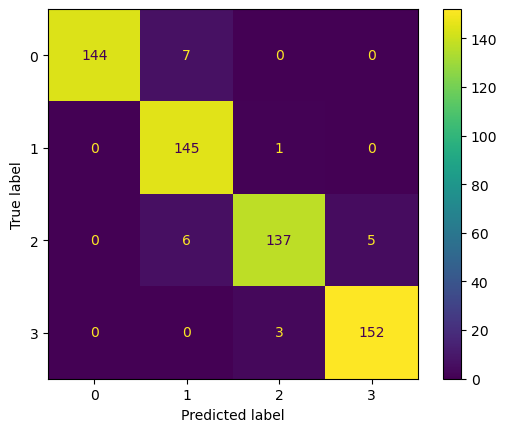

In [25]:
y_pred = best_model.predict(X_test)

print(f"Best score from folds: {grid.best_score_}")
print(f"Best params: {grid.best_params_}")

print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)
plt.show()

Best score from folds: 0.9650000000000001
Best params: {'logisticregression__C': 12, 'logisticregression__class_weight': None, 'logisticregression__solver': 'newton-cg'}
Precision: 0.9647540907989736
Recall: 0.9633333333333334
F1 Score: 0.9633954084466719
Accuracy: 0.9633333333333334


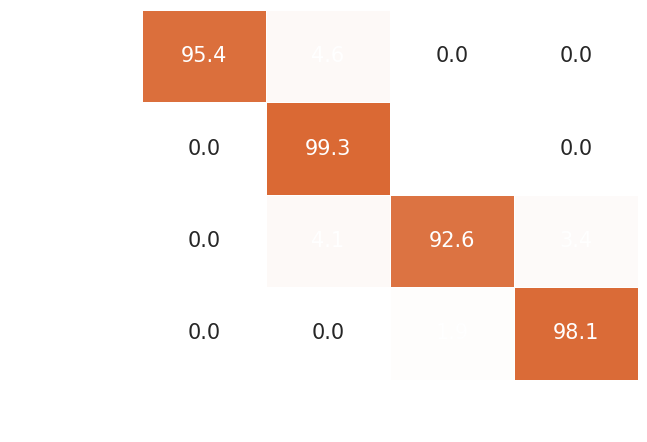

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Generate predictions
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print(f"Best score from folds: {grid.best_score_}")
print(f"Best params: {grid.best_params_}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
# Define labels for the ticks
tick_labels = ['Budget', 'Mid-range', 'Premium', 'Luxury']

# Convert hexadecimal color code to RGB format
hex_color = '#da6934'
rgb_color = plt.matplotlib.colors.hex2color(hex_color)

# Define a custom colormap with alpha values ranging from 0 (transparent) to 1 (opaque)
colors = [(1, 1, 1, 0)] + [(*rgb_color, i) for i in np.linspace(0, 1, 256)]
custom_cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("CustomMap", colors)

# Create the heatmap with the customized colormap
sns.heatmap(conf_matrix_percentage, cmap=custom_cmap, annot=True, fmt=".1f", linewidths=0.5, cbar=False, annot_kws={"fontsize": 15})

# Set tick labels and tick parameters
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=tick_labels, color='white', fontsize=14)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=tick_labels, color='white', rotation=0, fontsize=14)
plt.tick_params(axis='both', length=0)

# Set labels for x-axis and y-axis
plt.xlabel("Predicted", color='white', fontsize=17)
plt.ylabel("True", color='white', fontsize=17)

# Show the plot
plt.savefig('confusionmatrix_testdata2.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


# Supervised Machine Learning Project: Mobile Phone Price Range Prediction

## 1. Introduction
### Title Slide
- **Title**: Mobile Phone Price Range Prediction
- **Author**: [Your Name]
- **Date**: [Presentation Date]

### Overview
- **Dataset**: Statistics on mobile phones
- **Objective**: Predict which of the four price range categories a phone belongs to

## 2. Data Understanding
### Dataset Description
- **Key Features**: RAM, battery size, screen size, etc.
- **Visuals**: 
  - Table or bar chart showing feature distribution

### Target Variable
- **Price Range Categories**: 4 categories
- **Visuals**: 
  - Pie chart or bar chart showing price category distribution

## 3. Data Preprocessing
### Missing Values
- **Handling Missing Values**: Explain methods used
- **Visuals**: 
  - Bar chart showing missing values before and after handling

### Feature Engineering
- **New Features**: Describe any transformations or new features created
- **Visuals**: 
  - Example transformations or new feature distributions

### Data Splitting
- **Training and Test Sets**: Explain the split ratio
- **Visuals**: 
  - Pie chart or bar chart showing the data split

## 4. Exploratory Data Analysis (EDA)
### Correlations
- **Correlation Matrix**: Highlight relationships between features and target variable
- **Visuals**: 
  - Heatmap of the correlation matrix

### Feature Distributions
- **Key Feature Distributions**: RAM, battery size, etc.
- **Visuals**: 
  - Histograms or box plots of key features

## 5. Model Selection and Training
### Chosen Models
- **List of Models**: Logistic Regression, Random Forest, SVM, etc.
- **Visuals**: 
  - Bar chart comparing initial performance (accuracy, precision, recall, F1 score) of different models

### Stacking Ensemble
- **Concept Explanation**: Explain the stacking ensemble method
- **Visuals**: 
  - Diagram of the stacking ensemble architecture

## 6. Hyperparameter Tuning
### Grid Search/Randomized Search
- **Tuning Process**: Describe the tuning process
- **Visuals**: 
  - Table or plot showing the results of hyperparameter tuning

## 7. Model Evaluation
### Best Model Performance
- **Test Set Performance**: Present the performance of the best model
- **Visuals**: 
  - Confusion matrix
  - Bar charts for accuracy, precision, recall, and F1 score

### Error Analysis
- **Model Errors**: Highlight where the model performs well and where it doesn’t
- **Visuals**: 
  - Confusion matrix with errors highlighted
  - Misclassified example analysis

## 8. Feature Importance
### Important Features
- **Feature Importance**: Show the importance of different features in the best model
- **Visuals**: 
  - Bar chart or feature importance plot

## 9. Conclusion and Future Work
### Summary
- **Key Findings**: Summarize the main results and model performance

### Future Work
- **Improvements**: Suggest potential improvements and future work
- **Visuals**: 
  - List with bullet points, possibly illustrated with icons or simple diagrams

## 10. Q&A
### Prepare for Questions
- Be ready to answer questions about your methodology, results, and potential improvements

## Tips for a Compelling Presentation
- **Clarity**: Keep slides simple and avoid clutter. Each slide should convey a single idea or concept.
- **Engagement**: Use visuals to keep the audience engaged. Graphs, charts, and diagrams are more engaging than text-heavy slides.
- **Practice**: Rehearse your presentation multiple times to ensure smooth delivery and timing.
- **Storytelling**: Tell a story with your data. Highlight why your project is important and what impact it could have.

## Example Visualizations
- **Correlation Matrix Heatmap**: Shows relationships between features.
- **Confusion Matrix**: Visualizes model performance on different classes.
- **Feature Importance Plot**: Highlights the most important features in your model.
- **Performance Comparison Bar Chart**: Compares different models' performance metrics.


## Trying to stack LogReg and Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import scipy.stats as stats

# Assuming df is your DataFrame
X = df.drop(columns=['blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                     'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'sc_h', 'sc_w', 
                     'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'])
y = df['price_range']

# Split the data into training, meta, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_base, X_meta, y_train_base, y_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Define the parameter distributions for base_model1
param_dist_model1 = {
    'C': stats.uniform(0.1, 20),  # Regularization strength
    'max_iter': [10000]   # Maximum number of iterations
}

# Initialize RandomizedSearchCV for base_model1
random_search_model1 = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=param_dist_model1, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)

# Perform randomized search for base_model1
random_search_model1.fit(X_train_base, y_train_base)

# Get the best hyperparameters and best estimator for base_model1
best_params_model1 = random_search_model1.best_params_
best_estimator_model1 = random_search_model1.best_estimator_

# Define the parameter distributions for base_model2
param_dist_model2 = {
    'n_estimators': stats.randint(50, 200),  # Number of trees in the forest
    'max_depth': [None, 20, 50, 100],               # Maximum depth of the trees
    'min_samples_split': [2,3,5],
    'min_samples_leaf': [1,2,4]
}

# Initialize RandomizedSearchCV for base_model2
random_search_model2 = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist_model2, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)

# Perform randomized search for base_model2
random_search_model2.fit(X_train_base, y_train_base)

# Get the best hyperparameters and best estimator for base_model2
best_params_model2 = random_search_model2.best_params_
best_estimator_model2 = random_search_model2.best_estimator_

# Train base models on the training data using the best hyperparameters
base_model1 = LogisticRegression(**best_params_model1)
base_model1.fit(X_train_base, y_train_base)

base_model2 = RandomForestClassifier(**best_params_model2)
base_model2.fit(X_train_base, y_train_base)

# Generate predictions on the meta set
preds_base_model1 = base_model1.predict(X_meta)
preds_base_model2 = base_model2.predict(X_meta)

# Concatenate predictions from base models as additional features
X_meta_stacked = np.column_stack((preds_base_model1, preds_base_model2))

# Train a meta-model on the predictions from the base models
meta_model = LogisticRegression()
meta_model.fit(X_meta_stacked, y_meta)

# Generate predictions on the test set
preds_test_base_model1 = base_model1.predict(X_test)
preds_test_base_model2 = base_model2.predict(X_test)

# Concatenate predictions from base models as additional features for the test set
X_test_stacked = np.column_stack((preds_test_base_model1, preds_test_base_model2))

# Generate final predictions using the meta-model
final_preds = meta_model.predict(X_test_stacked)

# Calculate accuracy
accuracy = accuracy_score(y_test, final_preds)

# Print stats for the meta-model
print(f"Best score from folds: {accuracy}")
print(f"Best params for model 1: {best_params_model1}")
print(f"Best params for model 2: {best_params_model2}")
print(f"Precision: {precision_score(y_test, final_preds, average='weighted')}")
print(f"Recall: {recall_score(y_test, final_preds, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, final_preds, average='weighted')}")
print(f"Accuracy: {accuracy}")

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, final_preds)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import scipy.stats as stats

# Assuming df is your DataFrame
X = df.drop(columns=['blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                     'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'sc_h', 'sc_w', 
                     'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'])
y = df['price_range']

# Split the data into training, meta, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_base, X_meta, y_train_base, y_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Print predictions made on the training data before training the models
print("Predictions made on the training data before training the models:")
print("----------------------------------------------------------------")
print("First few predictions:")
print("Predictions on X_train_base:")
print(X_train_base.head())
print("\nPredictions on y_train_base:")
print(y_train_base.head())
print("----------------------------------------------------------------")

# Define the parameter distributions for base_model1
param_dist_model1 = {
    'C': stats.uniform(0.1, 20),  # Regularization strength
    'max_iter': [10000]   # Maximum number of iterations
}

# Initialize RandomizedSearchCV for base_model1
random_search_model1 = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=param_dist_model1, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)

# Perform randomized search for base_model1
random_search_model1.fit(X_train_base, y_train_base)

# Get the best hyperparameters and best estimator for base_model1
best_params_model1 = random_search_model1.best_params_
best_estimator_model1 = random_search_model1.best_estimator_

# Define the parameter distributions for base_model2
param_dist_model2 = {
    'n_estimators': stats.randint(50, 200),  # Number of trees in the forest
    'max_depth': [None, 20, 50, 100],               # Maximum depth of the trees
    'min_samples_split': [2,3,5],
    'min_samples_leaf': [1,2,4]
}

# Initialize RandomizedSearchCV for base_model2
random_search_model2 = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist_model2, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)

# Perform randomized search for base_model2
random_search_model2.fit(X_train_base, y_train_base)

# Get the best hyperparameters and best estimator for base_model2
best_params_model2 = random_search_model2.best_params_
best_estimator_model2 = random_search_model2.best_estimator_

# Train base models on the training data using the best hyperparameters
base_model1 = LogisticRegression(**best_params_model1)
base_model1.fit(X_train_base, y_train_base)

base_model2 = RandomForestClassifier(**best_params_model2)
base_model2.fit(X_train_base, y_train_base)

# Generate predictions on the meta set
preds_base_model1 = base_model1.predict(X_meta)
preds_base_model2 = base_model2.predict(X_meta)

# Concatenate predictions from base models as additional features
X_meta_stacked = np.column_stack((preds_base_model1, preds_base_model2))

# Train a meta-model on the predictions from the base models
meta_model = LogisticRegression()
meta_model.fit(X_meta_stacked, y_meta)

# Generate predictions on the test set
preds_test_base_model1 = base_model1.predict(X_test)
preds_test_base_model2 = base_model2.predict(X_test)

# Concatenate predictions from base models as additional features for the test set
X_test_stacked = np.column_stack((preds_test_base_model1, preds_test_base_model2))

# Generate final predictions using the meta-model
final_preds = meta_model.predict(X_test_stacked)

# Calculate accuracy
accuracy = accuracy_score(y_test, final_preds)

# Print stats for the meta-model
print("Predictions made on the training and test data after training the models:")
print("-----------------------------------------------------------------------")
print(f"Best score from folds: {accuracy}")
print(f"Best params for model 1: {best_params_model1}")
print(f"Best params for model 2: {best_params_model2}")
print(f"Precision: {precision_score(y_test, final_preds, average='weighted')}")
print(f"Recall: {recall_score(y_test, final_preds, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, final_preds, average='weighted')}")
print(f"Accuracy: {accuracy}")

# Display the confusion matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, final_preds)
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Define labels for the ticks
tick_labels = ['Budget', 'Mid-range', 'Premium', 'Luxury']

# Convert hexadecimal color code to RGB format
hex_color = '#da6934'
rgb_color = plt.matplotlib.colors.hex2color(hex_color)

# Define a custom colormap with alpha values ranging from 0 (transparent) to 1 (opaque)
colors = [(1, 1, 1, 0)] + [(*rgb_color, i) for i in np.linspace(0, 1, 256)]
custom_cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("CustomMap", colors)

# Create the heatmap with the customized colormap
sns.heatmap(conf_matrix_percentage, cmap=custom_cmap, annot=True, fmt=".1f", linewidths=0.5, cbar=False, annot_kws={"fontsize": 15})

# Set tick labels and tick parameters
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=tick_labels, color='white', fontsize=14)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=tick_labels[::-1], color='white', rotation=0, fontsize=14)
plt.tick_params(axis='both', length=0)

# Set labels for x-axis and y-axis
plt.xlabel("Predicted", color='white', fontsize=17)
plt.ylabel("True", color='white', fontsize=17)

# Show the plot
plt.savefig('confusionmatrix_testdata2.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


In [ ]:
df2 = pd.read_csv('CellPhone_test.csv')
df2

In [ ]:
X_test_new = df2.drop(columns=['id','blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                               'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'sc_h', 'sc_w', 
                               'talk_time', 'three_g', 'touch_screen', 'wifi'])

# Generate predictions on the new test set
preds_test_base_model1_new = base_model1.predict(X_test_new)
preds_test_base_model2_new = base_model2.predict(X_test_new)

# Concatenate predictions from base models as additional features for the new test set
X_test_stacked_new = np.column_stack((preds_test_base_model1_new, preds_test_base_model2_new))

# Generate final predictions using the meta-model on the new test set
final_preds_new = meta_model.predict(X_test_stacked_new)


In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of the predicted values
plt.figure(figsize=(8, 6))
plt.hist(final_preds_new, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Price Range')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Price Range')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming X_test_new contains your new test dataset without the target variable
# Assuming final_preds_new contains your predicted values

# Choose one or two features to visualize against the predicted values
feature_to_visualize = 'ram'  # Replace 'feature_name' with the name of the feature you want to visualize

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test_new[feature_to_visualize], final_preds_new, color='skyblue', alpha=0.7)
plt.xlabel('Feature to Visualize')
plt.ylabel('Predicted Price Range')
plt.title('Scatter Plot of Predicted Price Range vs. Feature')
plt.grid(True)
plt.show()


# Building Visuals

In [ ]:
# Get feature names
feature_names = X.columns

# Get coefficients of the logistic regression model
coefficients = meta_model.coef_[0]

# Sort coefficients by their absolute values
indices = np.argsort(np.abs(coefficients))[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), coefficients[indices], align="center")
plt.xticks(range(len(indices)), feature_names[indices], rotation=90)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained a RandomForestClassifier model named 'base_model2'

# Get feature importances
importances = base_model2.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


In [ ]:
sns.heatmap(df.corr())

In [ ]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'SVC', 'KNeighbors', 'XGB']

# Cross fold scores
cross_fold_scores = [0.951, 0.813, 0.865, 0.861, 0.466, 0.895]


# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(classifiers, cross_fold_scores, color='skyblue')
plt.xlabel('Cross Fold Score')
plt.title('Cross Fold Scores of Different Classifiers')
plt.xlim(0, 1)  # Set x-axis limit to range from 0 to 1
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'SVC', 'KNeighbors', 'XGB']

# Cross fold scores
cross_fold_scores = [0.951, 0.813, 0.865, 0.861, 0.466, 0.895]

# Reorder by size
classifiers_sorted = [x for _, x in sorted(zip(cross_fold_scores, classifiers), reverse=True)]
cross_fold_scores_sorted = sorted(cross_fold_scores, reverse=True)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(classifiers_sorted, cross_fold_scores_sorted, color='grey')
bars[0].set_color('#C46B3E')  # Change color of the highest score bar
plt.xlabel('Cross Fold Score', color='white', fontsize=14)
plt.ylabel('', color='white', fontsize=14)
plt.title('', color='white', fontsize=17)
plt.tick_params(axis='x', colors='white', labelsize=12)
plt.tick_params(axis='y', colors='white', labelsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.xlim(0, 1)  # Set x-axis limit to range from 0 to 1
plt.savefig('cross_fold_scores.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Calculate frequency of each predicted price range
unique_preds, counts = np.unique(final_preds_new, return_counts=True)

# Define tick labels
tick_labels = ['Budget', 'Mid-range', 'Premium', 'Luxury']

# Define colors
colors = ['#da6934', '#52da34', '#34a5da', '#bc34da']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_preds, counts, color=colors, edgecolor='black')
plt.ylabel('', color='white', fontsize=14)
plt.xticks(unique_preds, tick_labels, color='white', fontsize=14)  # Set x-ticks and their labels
plt.yticks(color='white', fontsize=14)  # Set y-ticks and their labels
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='both', colors='white')
plt.savefig('bar_chart_predicted_price_range.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
